In [171]:
# Reading the data

import os
import csv
import os.path
import pandas as pd
userhome = os.path.expanduser('~')
csvfile= os.path.join(userhome, 'Desktop', 'gold1.csv')
open(csvfile, "r")
data=pd.read_csv(csvfile, header=0)
data.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,8-Mar-18,1322.50,1325.30,1329.80,1319.60,0,-0.38
1,7-Mar-18,1327.60,1339.50,1342.00,1323.00,305.08K,-0.57
2,6-Mar-18,1335.20,1321.00,1339.90,1320.80,285.92K,1.16
3,5-Mar-18,1319.90,1324.90,1328.90,1318.30,221.22K,-0.32
4,4-Mar-18,1324.20,1325.10,1325.40,1322.70,0,0.06


In [172]:
data.describe()

,Change %
count,820.000000
mean,0.009085
std,0.838063
min,-3.320000
25%,-0.432500
50%,0.000000
75%,0.460000
max,4.660000


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 7 columns):
Date        820 non-null object
Price       821 non-null object
Open        821 non-null object
High        821 non-null object
Low         821 non-null object
Vol.        821 non-null object
Change %    820 non-null float64
dtypes: float64(1), object(6)
memory usage: 45.0+ KB


In [174]:
# Converting Price from object to float data type

data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 7 columns):
Date        820 non-null object
Price       820 non-null float64
Open        821 non-null object
High        821 non-null object
Low         821 non-null object
Vol.        821 non-null object
Change %    820 non-null float64
dtypes: float64(2), object(5)
memory usage: 45.0+ KB


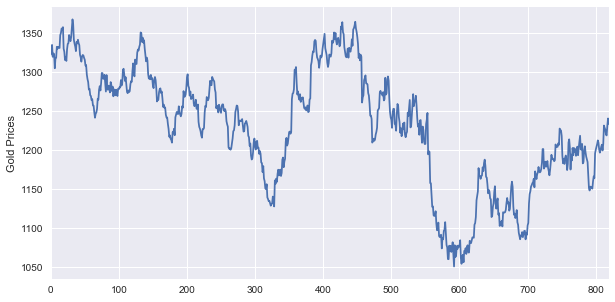

,S_3,S_9
9,1313.900000,1321.611111
10,1323.100000,1322.755556
11,1327.233333,1323.055556
12,1331.933333,1322.777778
13,1331.700000,1324.133333


In [175]:
from sklearn.linear_model import LinearRegression 

import pandas as pd 

import numpy as np 
 
import matplotlib.pyplot as plt 

import seaborn as sns
import datetime

data=data[['Price']] 

# Drop rows with missing values 

data= data.dropna() 

# Plot the price of GLD 

data.Price.plot(figsize=(10,5)) 
plt.ylabel("Gold Prices")
plt.show()
# Define explanatory variables - he explanatory variables in this strategy are the moving averages for past 
#3 days and 9 days

data['S_3'] = data['Price'].shift(1).rolling(window=3).mean() 
data['S_9']= data['Price'].shift(1).rolling(window=9).mean() 
data= data.dropna()
X = data[['S_3','S_9']] 
X.head()


In [176]:

y = data['Price']
y.head()

9     1332.8
10    1330.3
11    1332.7
12    1332.1
13    1331.2
Name: Price, dtype: float64

In [177]:
# Splitting the data into train and test datasets
t=.8 
t = int(t*len(data)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [178]:
# fitting linear regression

linear = LinearRegression().fit(X_train,y_train) 

print ("Gold Price =", round(linear.coef_[0],2),  

"* 3 Days Moving Average", round(linear.coef_[1],2), 

"* 9 Days Moving Average +", round(linear.intercept_,2))

Gold Price = 1.28 * 3 Days Moving Average -0.3 * 9 Days Moving Average + 19.87


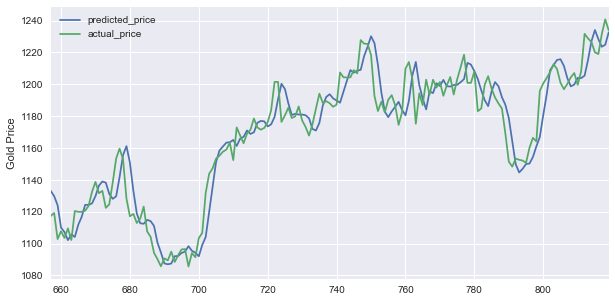

In [179]:
# predicting the prices and plotting the actual and predicted values
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  

plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Gold Price")
plt.show()

In [180]:
# calculating R-Square

r2_score = linear.score(X[t:],y[t:])*100  
float("{0:.2f}".format(r2_score))

90.65